# Natural Langugage Processing to classify Yelp Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
yelp_data = pd.read_csv('yelp.csv')

In [3]:
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_data['text_length'] = yelp_data['text'].apply(len)

In [7]:
yelp_data.groupby(by =['stars', 'text_length']).count()['text']

stars  text_length
1      11             1
       12             1
       14             1
       15             1
       17             1
                     ..
5      4379           1
       4494           1
       4795           1
       4960           1
       4986           1
Name: text, Length: 5129, dtype: int64

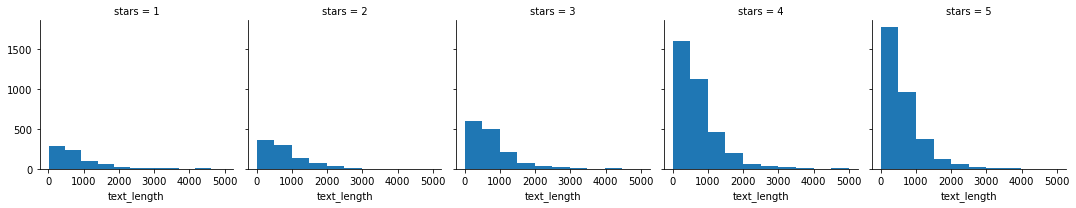

In [8]:
g = sns.FacetGrid(data = yelp_data, col = 'stars')
g.map(plt.hist,'text_length')

<AxesSubplot:xlabel='stars', ylabel='text_length'>

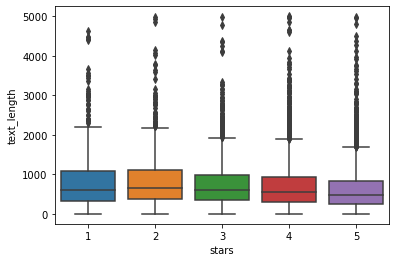

In [9]:
sns.boxplot(x = 'stars', y = 'text_length', data = yelp_data)

<AxesSubplot:xlabel='stars', ylabel='count'>

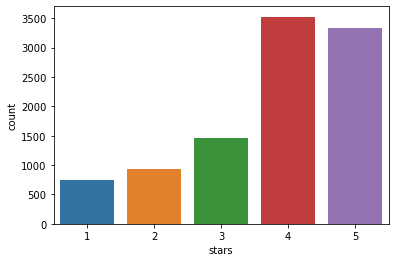

In [10]:
sns.countplot(x = 'stars', data = yelp_data)

In [11]:
gdf = yelp_data.groupby('stars').mean()
gdf

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
gdfc = gdf.corr()
gdfc

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

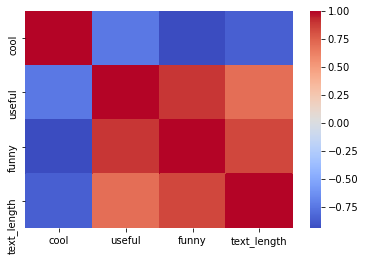

In [13]:
sns.heatmap(gdfc, cmap = 'coolwarm')

In [14]:
yelp_class = yelp_data[(yelp_data['stars'] == 1) | (yelp_data['stars'] == 5)]

In [15]:
yelp_class.groupby('stars').count()

,business_id,date,review_id,text,type,user_id,cool,useful,funny,text_length
stars,,,,,,,,,,
1,749,749,749,749,749,749,749,749,749,749
5,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337


In [17]:
#reating features and target labels

X = yelp_class['text']
y = yelp_class['stars']

import string

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
yelp_cv = CountVectorizer().fit(X)

In [19]:
X = yelp_cv.transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

In [22]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [23]:
predictions = nb_model.predict(X_test)

In [24]:
predictions

array([5, 5, 5, ..., 1, 5, 5], dtype=int64)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[157  75]
 [ 26 968]]
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       232
           5       0.93      0.97      0.95       994

    accuracy                           0.92      1226
   macro avg       0.89      0.83      0.85      1226
weighted avg       0.91      0.92      0.91      1226

